In [10]:
import igraph
from igraph import Graph, EdgeSeq


nr_vertices = 25
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

In [3]:
class Node:
    def __init__(self, parent=None):
        self.parent = parent
        self.children = []

# Build a small tree
root = Node()
child1 = Node(root)
child2 = Node(root)
root.children = [child1, child2]
grandchild = Node(child1)
child1.children = [grandchild]

# Assign indices and gather edges
nodes = []
edges = []
def traverse(node, parent_idx=None):
    idx = len(nodes)
    nodes.append(node)
    if parent_idx is not None:
        edges.append((parent_idx, idx))
    for c in node.children:
        traverse(c, idx)

traverse(root)


G = Graph(edges=edges, directed=False)
lay = G.layout('rt')
# Convert positions to Plotly points
Xn, Yn, Xe, Ye = [], [], [], []
for i, pos in enumerate(lay):
    Xn.append(pos[0])
    Yn.append(pos[1])
for e in G.es:
    Xe += [lay[e.source][0], lay[e.target][0], None]
    Ye += [lay[e.source][1], lay[e.target][1], None]

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe, y=Ye, mode='lines'))
fig.add_trace(go.Scatter(x=Xn, y=Yn, mode='markers'))
fig.update_yaxes(autorange='reversed')
fig.show()

In [26]:
import igraph
import plotly.graph_objects as go
from igraph import EdgeSeq, Graph


class TreePlot:
    def __init__(self, root: Node):
        self.root = root
        self.nodes = []
        self.edges = []

    def create_tree(self):
        def traverse(node: Node, parent_idx=None):
            idx = len(self.nodes)
            self.nodes.append(node)
            if parent_idx is not None:
                self.edges.append((parent_idx, idx))
            for c in node.children:
                traverse(c, idx)

        traverse(self.root)
        self.create_plot()

    def create_plot(self):
        G = Graph(edges=self.edges, directed=False)
        lay = G.layout("rt")
        # Convert positions to Plotly points
        Xn, Yn, Xe, Ye = [], [], [], []
        for i, pos in enumerate(lay):
            Xn.append(pos[0])
            Yn.append(pos[1])
        for e in G.es:
            Xe += [lay[e.source][0], lay[e.target][0], None]
            Ye += [lay[e.source][1], lay[e.target][1], None]

        import plotly.graph_objects as go

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=Xe, y=Ye, mode="lines"))
        fig.add_trace(go.Scatter(x=Xn, y=Yn, mode="markers"))
        fig.update_yaxes(autorange="reversed")
        fig.show()

In [29]:
root = Node()
child1 = Node(root)
child2 = Node(root)
root.children = [child1, child2]
grandchild = Node(child1)
child1.children = [grandchild]


tp = TreePlot(root)
tp.create_tree()


In [41]:
def rotate_state(state: list[str]) -> list[str]:
    rotated_state: list[str] = []

    for i in range(len(state)):
        tmp = ""
        for j in range(len(state)):
            tmp += state[j][i]

        rotated_state.append(tmp)
    rotated_state.reverse()
    return rotated_state


def beatify_state(state: list[str]) -> str:
    beautified_state: str = ""
    for i in range(len(state)):
        for j in range(len(state)):
            beautified_state += f"{state[i][j]} "
        beautified_state += "<br>"
    return beautified_state


rot = rotate_state(["..#.#", "..X..", ".O.X#", "..XO.", "....."])
beatify_state(rot)

'# . # . . <br>. . X O . <br># X . X . <br>. . O . . <br>. . . . . <br>'

In [43]:
import torch

a = torch.tensor(
    [
        -1.2114e-02,
        7.4093e-03,
        -2.2767e-02,
        5.7563e-03,
        -2.1125e-02,
        2.0868e-02,
        4.5380e-03,
        5.8539e-03,
        -9.1735e-03,
        3.5187e-02,
        5.7606e-03,
        5.9224e-03,
        -1.1780e-02,
        -1.6311e-02,
        2.9002e-02,
        -8.8655e-03,
        -1.0327e-02,
        1.2472e-02,
        -3.1732e-03,
        4.2059e-02,
        -1.4111e-02,
        -1.6802e-02,
        -1.0000e09,
        2.0477e-02,
        -2.7329e-02,
        -4.4374e-02,
    ],
    device="cuda:0",
)

b = torch.tensor(
    [
        0.0395,
        0.0403,
        0.0391,
        0.0403,
        0.0392,
        0.0409,
        0.0402,
        0.0403,
        0.0397,
        0.0415,
        0.0403,
        0.0403,
        0.0396,
        0.0394,
        0.0412,
        0.0397,
        0.0396,
        0.0405,
        0.0399,
        0.0417,
        0.0395,
        0.0394,
        0.0000,
        0.0409,
        0.0389,
        0.0383,
    ],
    device="cuda:0",
)

print(torch.argmax(a))
print(torch.argmax(b))
print(torch.argmin(a))
print(torch.argmin(b))

tensor(19, device='cuda:0')
tensor(19, device='cuda:0')
tensor(22, device='cuda:0')
tensor(22, device='cuda:0')


In [50]:
import numpy as np

a = np.array([7])
a = a[0]
a == 0 and 4 == 24

np.False_

In [ ]:
import timeit
import numpy as np

board_width = 19
state = [np.array([0,0,0,0,0]), np.array([0,0,0,0,0]), np.array([0,0,0,0,0]), np.array([0,0,0,0,0]), np.array([0,0,0,0,0])]
leng = len(state)

print(timeit.timeit(lambda: len(state) ** 2, number=10**6))
print(timeit.timeit(lambda: len(state) * len(state), number=10**6))
print(timeit.timeit(lambda: leng ** 2, number=10**6))
print(timeit.timeit(lambda: leng * leng, number=10**6))

0.044347900002321694
0.0429260000018985
0.03558769999654032
0.025559800000337418


In [ ]:
import torch

a = [1,2,3,4]
a.append(5)


b = torch.zeros(26, device="cuda:0")
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [1]:
a = set([1,2,3,4,5,6,76])

for b in a:
    print(b)

1
2
3
4
5
6
76


In [69]:
import torch

def nth_non_zero_index(tensor, n):
    return torch.where(torch.nonzero(tensor, as_tuple=True)[0] == n)[0].item()

a = torch.tensor([0.0000, 0.0150, 0.0000, 0.0170, 0.0170, 0.0180, 0.0190, 0.0170, 0.0170,
        0.3774, 0.1441, 0.0170, 0.0000, 0.0160, 0.1872, 0.0170, 0.0160, 0.0180,
        0.0160, 0.0160, 0.0000, 0.0170, 0.0160, 0.0000, 0.0180, 0.0040],
       device='cuda:0')

nth_non_zero_index(a,1)

0

In [33]:
# Count non-zero elements before index 3
position_in_non_zero = (a[:1] != 0).sum().item()
print(position_in_non_zero)  # This will give you the position in the non-zero subset

0


In [63]:
position = torch.where(torch.nonzero(a, as_tuple=True)[0] == 23)[0]
position.item()

RuntimeError: a Tensor with 0 elements cannot be converted to Scalar

In [18]:
from gameserver_local_uf import GameServerGo
from Go.Go_uf import UnionFind
from typing import Any
import numpy as np

board = [".#.X.","X.XO#",".X.OO","..XO.","X##.."]

server = GameServerGo(5)
dec = server.go.encode_state(board)
uf = UnionFind.get_uf_from_state(dec, server.go.zobrist)
print(uf)

groups = uf.stones[uf.stones != 0]
print(groups)

parent: [-1, -1, -1, 3, -1, 5, -1, 7, 8, -1, -1, 11, -1, 8, 8, -1, -1, 17, 8, -1, 20, -1, -1, -1, -1],
colors: [-1, -1, -1, 1, -1, 1, -1, 1, 2, -1, -1, 1, -1, 2, 2, -1, -1, 1, 2, -1, 1, -1, -1, -1, -1],
rank: [-1, -1, -1, 0, -1, 0, -1, 0, 1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1],
stones: 0, 0, 0, 8, 0, 32, 0, 128, 286976, 0, 0, 2048, 0, 0, 0, 0, 0, 131072, 0, 0, 1048576, 0, 0, 0, 0,
liberties: 0, 0, 0, 20, 0, 1089, 0, 4164, 8916992, 0, 0, 70720, 0, 0, 0, 0, 0, 69632, 0, 0, 32768, 0, 0, 0, 0
[      8      32     128  286976    2048  131072 1048576]


In [19]:
def get_bit_indices(mask: np.uint64) -> np.ndarray[Any, np.dtype[np.int32]]:
    indices = np.empty(64, np.int32)
    count = 0
    for i in range(64):
        if (mask >> i) & 1:
            indices[count] = i
            count += 1
    return indices[:count]

liberty_counts = np.zeros((5, 5), dtype=np.int8)
groups = uf.stones[uf.stones != 0]
for group in groups:
    stones = get_bit_indices(group)
    for stone in stones:
        x, y = (stone // 5, stone % 5)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 5 and 0 <= ny < 5:
                if uf.state[nx, ny] == 0:
                    liberty_counts[x, y] += 1
                    
liberty_counts

array([[0, 0, 0, 2, 0],
       [3, 0, 3, 0, 0],
       [0, 4, 0, 1, 1],
       [0, 0, 2, 2, 0],
       [1, 0, 0, 0, 0]], dtype=int8)

In [7]:
from Go.Go_uf import get_bit_indices

get_bit_indices(67908)

array([ 2,  6,  8, 11, 16], dtype=int32)

In [11]:
divmod(6, 5)

(1, 1)

0.8699870248557562

In [1]:
import numpy as np
def cpuct(visits: int, value: float, cpuct: float, prior: float):
    return value + cpuct * prior * (np.sqrt(visits) / (1 + visits))

In [2]:
import torch

a = torch.tensor([[1.0,2.0,3.0,4.0,5.0]], device="cuda:0")
torch.softmax(a[:,0:2], dim=1)

tensor([[0.2689, 0.7311]], device='cuda:0')

In [28]:
min_score = -30.5
max_score = 30.5
num_possible_scores = int(30.5 * 2 + 1)  # +1 for zero, +1 for buffer

possible_scores = torch.linspace(min_score, max_score, num_possible_scores)
possible_scores

tensor([-30.5000, -29.5000, -28.5000, -27.5000, -26.5000, -25.5000, -24.5000,
        -23.5000, -22.5000, -21.5000, -20.5000, -19.5000, -18.5000, -17.5000,
        -16.5000, -15.5000, -14.5000, -13.5000, -12.5000, -11.5000, -10.5000,
         -9.5000,  -8.5000,  -7.5000,  -6.5000,  -5.5000,  -4.5000,  -3.5000,
         -2.5000,  -1.5000,  -0.5000,   0.5000,   1.5000,   2.5000,   3.5000,
          4.5000,   5.5000,   6.5000,   7.5000,   8.5000,   9.5000,  10.5000,
         11.5000,  12.5000,  13.5000,  14.5000,  15.5000,  16.5000,  17.5000,
         18.5000,  19.5000,  20.5000,  21.5000,  22.5000,  23.5000,  24.5000,
         25.5000,  26.5000,  27.5000,  28.5000,  29.5000,  30.5000])

In [8]:
is_white = True
a = torch.ones(12)
a[6:] = -1
a[3:9] = 0

ownership_mask_perspective = a * (-1 if is_white else 1)
ownership_mask_perspective[ownership_mask_perspective == 0] = 0.5
ownership_mask_perspective[ownership_mask_perspective == -1] = 0

alt = (torch.nn.functional.tanh(a) + 1) / 2
alt

tensor([0.8808, 0.8808, 0.8808, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.1192, 0.1192, 0.1192])

In [1]:
import numpy as np

print(np.arange(-3, 3.5, 0.5))

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [40]:
score_vec: list[float] = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]
num_possible_scores = len(score_vec)

given_score = 3

int(num_possible_scores / 2) + (given_score * 2)

12

In [7]:
a = torch.tensor([0.3, 0.5, 0.7, 0.5])
print(a[:2])
torch.nn.functional.log_softmax(a[:2], dim=0)

tensor([0.3000, 0.5000])


tensor([-0.7981, -0.5981])

In [16]:
a = torch.tensor([[0.3, 0.5, 0.7, 0.5],[0.3, 0.5, 0.7, 0.5],[0.3, 0.5, 0.7, 0.5]])
torch.cumsum(a, dim=1)

tensor([[0.3000, 0.8000, 1.5000, 2.0000],
        [0.3000, 0.8000, 1.5000, 2.0000],
        [0.3000, 0.8000, 1.5000, 2.0000]])

In [15]:
import torch

a = torch.rand(12)
print(a)
torch.floor(a[2])
a

tensor([0.9619, 0.1828, 0.9409, 0.9041, 0.0591, 0.3805, 0.9988, 0.5088, 0.0046,
        0.4723, 0.8889, 0.3254])


tensor([0.9619, 0.1828, 0.9409, 0.9041, 0.0591, 0.3805, 0.9988, 0.5088, 0.0046,
        0.4723, 0.8889, 0.3254])

In [60]:
import matplotlib.pyplot as plt

a = torch.tensor(
    [
        [
            [-0.2741, 0.1356, 0.1368, -0.2939, 0.1632],
            [0.0639, -0.1696, -0.0322, -0.1380, 0.5666],
            [0.5406, 0.0668, 0.3042, 0.3863, -0.1193],
            [-0.1446, 0.3241, 0.0473, 0.3114, 0.3818],
            [0.0719, 0.1603, 0.1496, -0.3603, -0.0869],
        ]
    ]
).squeeze(0)


In [78]:
black_y, black_x = torch.where(a < 0)
white_y, white_x = torch.where(a > 0)

print(black_x, black_y)
print(white_x, white_y)

tensor([0, 3, 1, 2, 3, 4, 0, 3, 4]) tensor([0, 0, 1, 1, 1, 2, 3, 4, 4])
tensor([1, 2, 4, 0, 4, 0, 1, 2, 3, 1, 2, 3, 4, 0, 1, 2]) tensor([0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4])


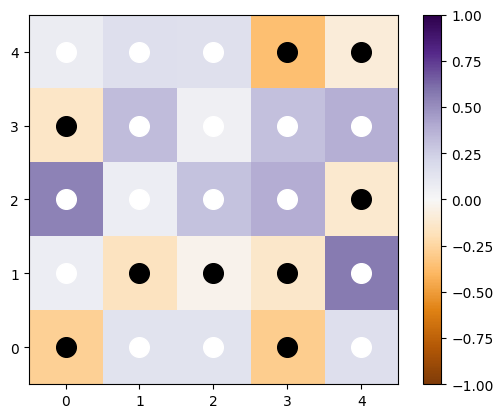

In [79]:
fig, ax = plt.subplots()

im = ax.imshow(a.numpy(), cmap="PuOr", interpolation="nearest", vmin=-1, vmax=1, origin="lower")

ax.scatter(black_x, black_y, c="black", s=200, alpha=1)
ax.scatter(white_x, white_y, c="white", s=200, alpha=1)

cbar = fig.colorbar(im, ax=ax)

In [ ]:
from typing import Any
import numpy as np
import torch


def deprocess_state(state: torch.Tensor, is_white: bool) -> np.ndarray[Any, np.dtype[np.int8]]:
    """
    Deprocess the state tensor into a numpy array.
    """
    new_state = np.zeros((5, 5), dtype=np.int8)
    new_state[state[0] == 1] = 3  # disabled stones
    if is_white:
        new_state[state[1] == 1] = 2  # own stones
        new_state[state[2] == 1] = 1  # opponent stones
    else:
        new_state[state[1] == 1] = 1  # own stones
        new_state[state[2] == 1] = 2  # opponent stones
    return new_state


def decode_state(state: np.ndarray[Any, np.dtype[np.int8]]) -> list[str]:
    """
    Converts a numpy board array (with 0/1/2/3) back into the string-based representation.
    """
    decoded_board: list[str] = []
    for i in range(state.shape[0]):
        tmp = ""
        for j in range(state.shape[1]):
            val = state[i][j]
            if val == 0:
                tmp += "."
            elif val == 1:
                tmp += "X"
            elif val == 2:
                tmp += "O"
            elif val == 3:
                tmp += "#"
        decoded_board.append(tmp)
    return decoded_board


def encode_state(state: list[str]) -> np.ndarray[Any, np.dtype[np.int8]]:
    """
    Converts a list of strings (like [".....", "..X..", ...]) into a numpy array
    with the following encoding:
      '.' -> 0 (empty)
      'X' -> 1 (black)
      'O' -> 2 (white)
      '#' -> 3 (disabled)
    """
    transformed = np.zeros([5, 5], dtype=np.int8)
    for i, row_str in enumerate(state):
        for j, char in enumerate(row_str):
            if char == ".":
                transformed[i][j] = 0
            elif char == "X":
                transformed[i][j] = 1
            elif char == "O":
                transformed[i][j] = 2
            elif char == "#":
                transformed[i][j] = 3
    return transformed

In [29]:
state = torch.tensor(
    [
        [
            [1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0],
            [0.0, 0.0, 0.0, 0.0, 1.0],
            [1.0, 0.0, 1.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 1.0, 0.0, 1.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 1.0, 0.0, 1.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0],
            [1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 1.0, 0.0, 1.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 1.0, 0.0, 1.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0],
        ],
        [
            [0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 1.0, 0.0],
            [0.0, 1.0, 1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0],
        ],
    ]
).squeeze(0)


state_str = deprocess_state(state, True)


encode_state(decode_state(state_str))

array([[3, 0, 2, 1, 2],
       [0, 2, 2, 1, 0],
       [2, 1, 1, 1, 3],
       [0, 1, 1, 2, 3],
       [3, 1, 3, 0, 0]], dtype=int8)

In [ ]:
a = torch.tensor([1,2,3,4,4])

In [2]:
import torch
group = torch.zeros((3,5,5))
group

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [8]:
a = torch.tensor([1,2,3,4,5])
b = torch.nn.functional.softmax(a, dim=0, dtype=torch.float64)
c = torch.nn.functional.log_softmax(a, dim=0, dtype=torch.float64)
b,c

(tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364], dtype=torch.float64),
 tensor([-4.4519, -3.4519, -2.4519, -1.4519, -0.4519], dtype=torch.float64))

In [3]:
for i in range(2):
    print(i)


0
1
